In [2]:
from google.colab import files
uploaded = files.upload()



Saving titanic_advanced.csv to titanic_advanced (1).csv


1️⃣ ASK MEANINGFUL QUESTIONS
   PassengerId  Survived     Pclass  \
1            0         3     Braund   
2            1         1    Cumings   
3            1         3  Heikkinen   
4            1         1   Futrelle   
5            0         3      Allen   

                                          Name     Sex   Age  SibSp  Parch  \
1                              Mr. Owen Harris    male  22.0      1      0   
2   Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0   
3                                  Miss. Laina  female  26.0      0      0   
4           Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
5                            Mr. William Henry    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
1         A/5 21171   7.2500   NaN        S  
2          PC 17599  71.2833   C85        C  
3  STON/O2. 3101282   7.9250   NaN        S  
4            113803  53.1000  C123        S  
5            373450   8.0500   NaN   

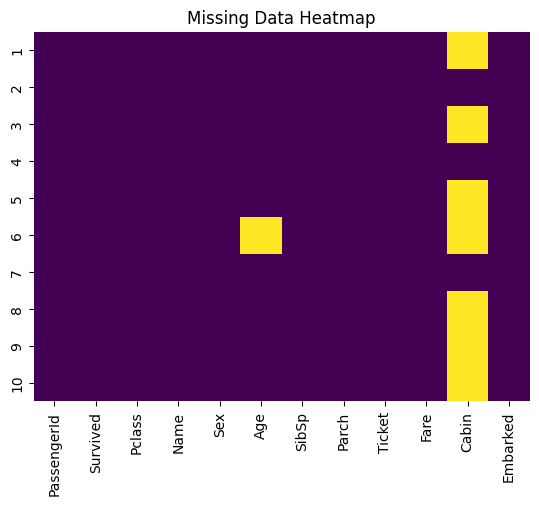

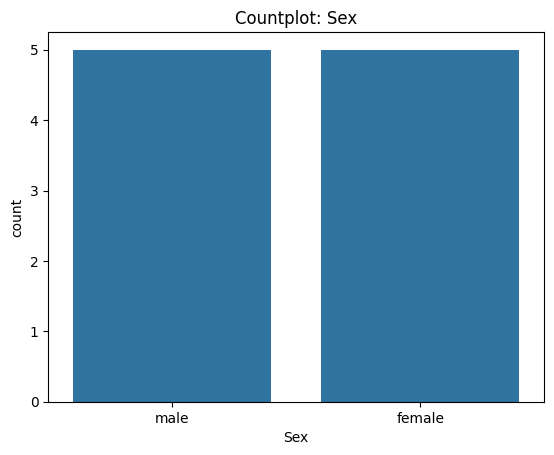

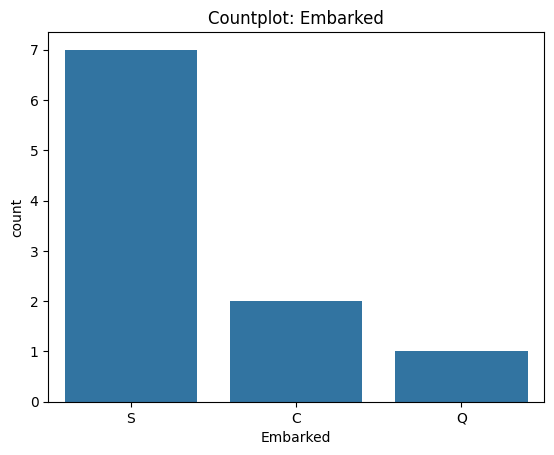

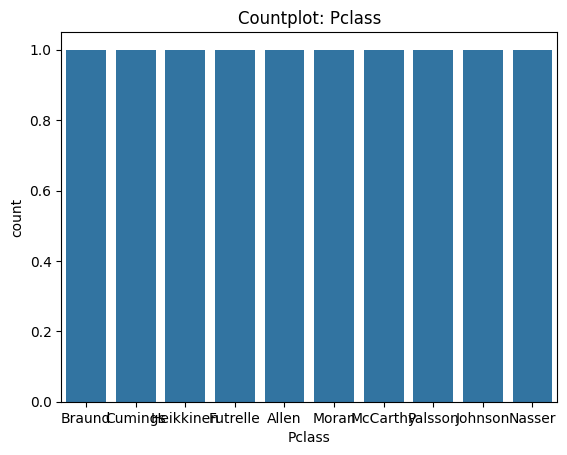

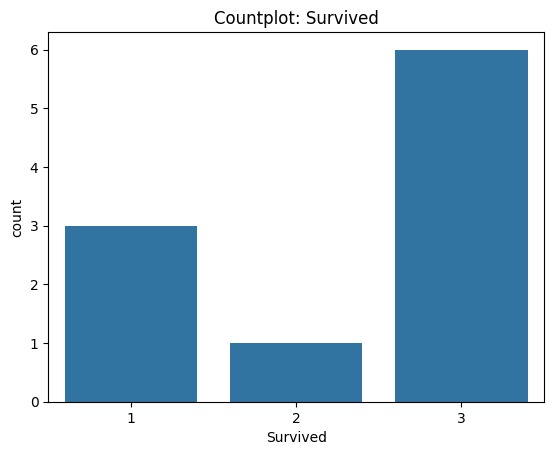

3️⃣ IDENTIFY TRENDS, PATTERNS, ANOMALIES


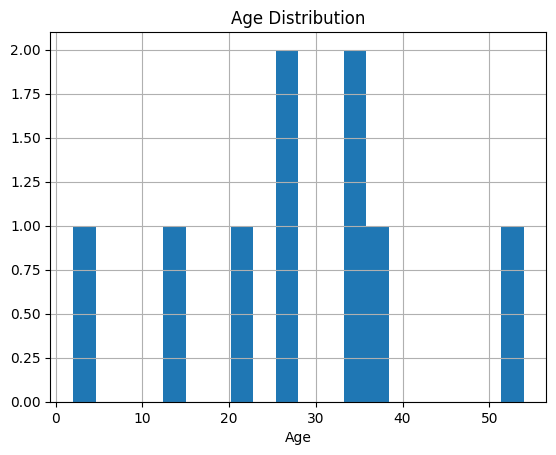

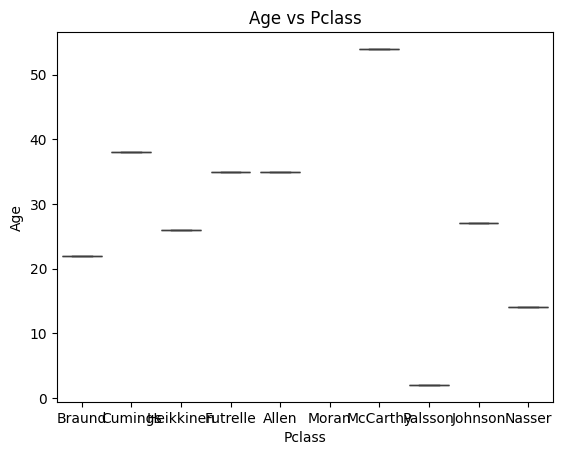

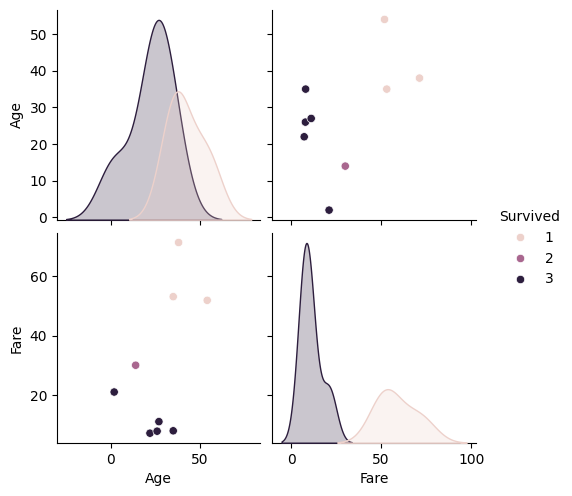

4️⃣ TEST HYPOTHESES & VALIDATE ASSUMPTIONS
Survived      int64
Pclass      float64
Age         float64
Fare        float64
SibSp         int64
Parch         int64
dtype: object
          Survived  Pclass       Age      Fare     SibSp     Parch
Survived  1.000000     NaN -0.612962 -0.959804 -0.012346  0.364405
Pclass         NaN     NaN       NaN       NaN       NaN       NaN
Age      -0.612962     NaN  1.000000  0.493930 -0.703807 -0.335134
Fare     -0.959804     NaN  0.493930  1.000000  0.177570 -0.263100
SibSp    -0.012346     NaN -0.703807  0.177570  1.000000  0.156174
Parch     0.364405     NaN -0.335134 -0.263100  0.156174  1.000000


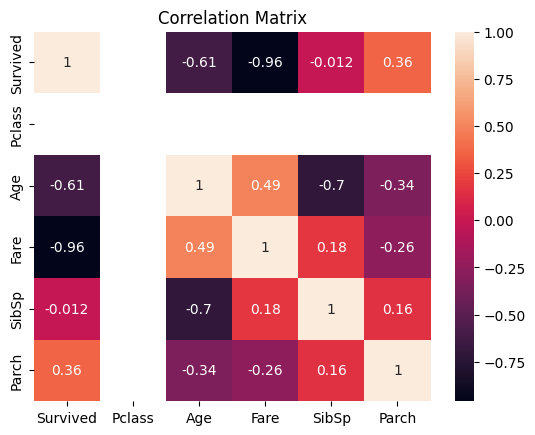

T-Test Fare Survived vs Not Survived: T=nan, P=nan
5️⃣ DETECT DATA ISSUES
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          7
Embarked       0
dtype: int64
Duplicates: 0
Outliers (Z>3):
0
✅ Titanic EDA Complete


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [4]:
#Run the full EDA script
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load uploaded Titanic file
df = pd.read_csv('titanic_advanced.csv')

print("="*50)
print("1️⃣ ASK MEANINGFUL QUESTIONS")
print("="*50)
print(df.head())
print(df.tail())
print("\nShape:", df.shape)
df.info()
print(df.describe(include='all'))
print("\nMissing Values:\n", df.isnull().sum())

print("\nQuestions:")
print("- Who survived and why?")
print("- Does class, sex, age affect survival?")
print("- Any missing ages or cabins?")

print("="*50)
print("2️⃣ EXPLORE DATA STRUCTURE")
print("="*50)
print(df.columns)
print(df.dtypes)
print(df.nunique())

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Countplots for basic categorical features
for col in ['Sex', 'Embarked', 'Pclass', 'Survived']:
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot: {col}')
    plt.show()

print("="*50)
print("3️⃣ IDENTIFY TRENDS, PATTERNS, ANOMALIES")
print("="*50)

df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age vs Pclass')
plt.show()

sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']].dropna(), hue='Survived')
plt.show()

print("="*50)
print("4️⃣ TEST HYPOTHESES & VALIDATE ASSUMPTIONS")
print("="*50)

# ✅ SAFE: Select only numeric columns and coerce to numeric
numeric_cols = df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].apply(pd.to_numeric, errors='coerce')
print(numeric_cols.dtypes)

# Correlation
corr = numeric_cols.corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Example t-test: Does Fare differ for Survived vs Not Survived?
survived = df[df['Survived'] == 1]['Fare']
not_survived = df[df['Survived'] == 0]['Fare']
t_stat, p_value = stats.ttest_ind(survived.dropna(), not_survived.dropna())
print(f"T-Test Fare Survived vs Not Survived: T={t_stat}, P={p_value}")

print("="*50)
print("5️⃣ DETECT DATA ISSUES")
print("="*50)
print(df.isnull().sum())
print(f'Duplicates: {df.duplicated().sum()}')

z_scores = np.abs(stats.zscore(numeric_cols.dropna()))
outliers = (z_scores > 3).sum()
print(f'Outliers (Z>3):\n{outliers}')

print("✅ Titanic EDA Complete")

